<a href="https://colab.research.google.com/github/thspanos/AI-LAb/blob/main/Thomas_Spanos_Ransomware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#εισαγωγή βιβλιοθηκών - πακέτων
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#εισαγωγή του συνόλου δεδομένων
dataset=pd.read_csv("https://raw.githubusercontent.com/thspanos/AI-LAb/refs/heads/main/Data/Ransomware.csv",sep='|')

In [ ]:
#eξερεύνηση συνόλου δεδομένων
dataset

/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [ ]:
#περιγραφικά στατιστικά συνόλου δεδομένων
dataset.describe()

/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [ ]:
# ανακάτεμα δεδομένων
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access
/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,VirusShare_f797ef22faae5bf4957ece4a1f6c2eba,f797ef22faae5bf4957ece4a1f6c2eba,332,224,258,10,0,119808,385024,0,...,6,3.776760,2.458492,5.317552,2740.166667,48,9640,72,15,0
1,VirusShare_8cb92a32053951be1d272d7733c97335,8cb92a32053951be1d272d7733c97335,332,224,783,2,56,29184,14848,110592,...,8,4.091269,2.458492,5.869969,2088.750000,48,9640,0,0,0
2,mstscax.dll,24b6f9bcf79ca5aae793ac598a436f97,34404,240,8226,9,0,2722816,1021440,0,...,98,4.544913,1.793116,7.090879,6004.775510,48,186162,0,17,1
3,VirusShare_e04a22f7f5d8abad2654f4cfcf2e0744,e04a22f7f5d8abad2654f4cfcf2e0744,332,224,33166,2,25,47616,21504,0,...,16,3.468275,1.174875,5.156196,647.125000,16,2216,0,15,0
4,VirusShare_f0c3f6546b6b3710a47f7c5da1bdd99a,f0c3f6546b6b3710a47f7c5da1bdd99a,332,224,258,11,0,113664,682496,0,...,7,4.453368,2.623078,7.967002,80992.857143,62,534528,0,0,0


In [ ]:
#tαξινόμηση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό
#0 legit, 1 ransomware
dataset.groupby(dataset['legitimate']).size()

/usr/local/lib/python3.11/dist-packages/google/colab/_reprs.py:211: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  series_as_table_html = series.to_frame()._repr_html_()  # pylint: disable=protected-access
/usr/local/lib/python3.11/dist-packages/google/colab/_reprs.py:211: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  series_as_table_html = series.to_frame()._repr_html_()  # pylint: disable=protected-access


,0
legitimate,
0,96724
1,41323


([<matplotlib.patches.Wedge at 0x7bbcf7552a50>,
 [Text(0.6484073680146373, 0.888576324861478, 'Malware'),
  Text(-0.6484076610757229, -0.8885761110103684, 'Legitimate')],
 [Text(0.3536767461898021, 0.4846779953789879, '30%'),
  Text(-0.35367690604130336, -0.48467787873292817, '70%')])

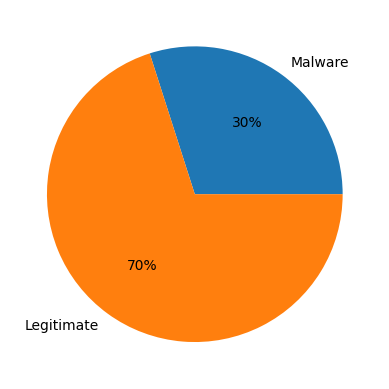

In [ ]:
#γραφική απεικόνιση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό#
#0 legit, 1 ransomware
type_classify=['Malware', 'Legitimate']
count_classify=[41323,96724]
plt.pie(count_classify, labels=type_classify, autopct='%0.f%%')

In [ ]:
#οπτικοποίηση της κατανομής των δεδομένων
import matplotlib.pyplot as plt
dataset.hist(bins = 50,figsize = (25,25))
plt.show()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

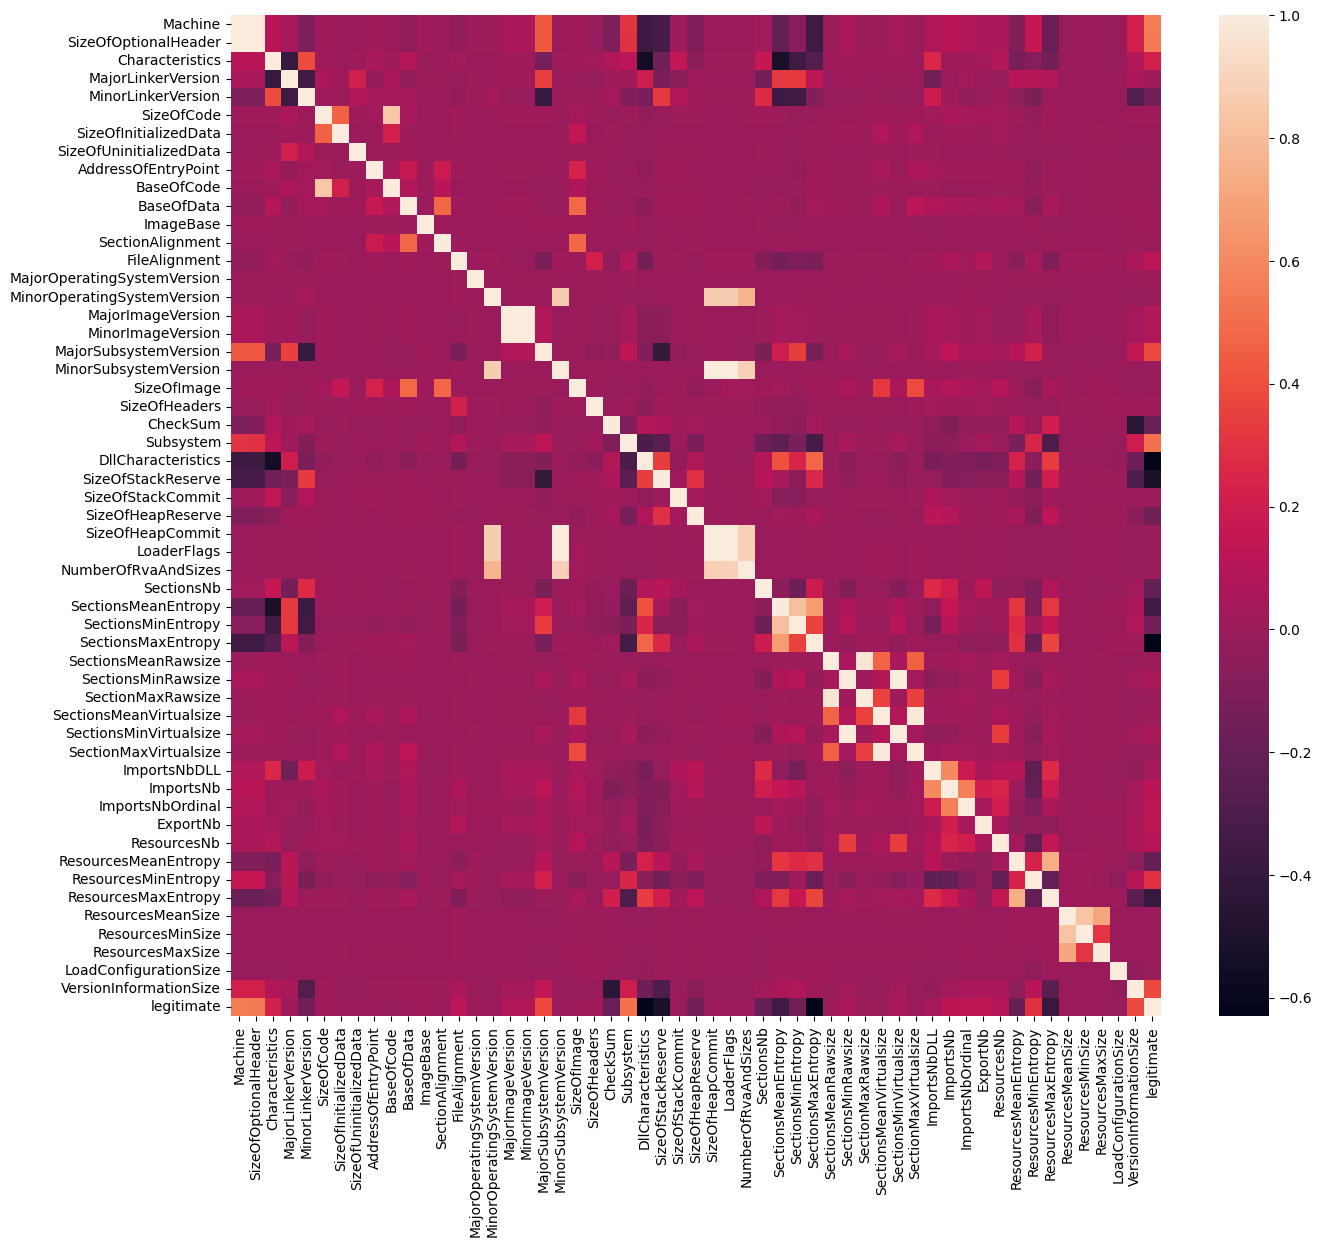

In [ ]:
#πίνακας συσχέτισης χαρακτηριστικών του συνόλου δεδομένων
plt.figure(figsize=(15,13))
# Αφαίρεση μη αριθμητικών columns
numeric_dataset = dataset.drop(['Name', 'md5'], axis=1)
# Απεικόνιση
sns.heatmap(numeric_dataset.corr())
plt.show()

In [ ]:
#έλεγχος κενών τιμών στα δεδομένα
dataset.isnull().sum()

/usr/local/lib/python3.11/dist-packages/google/colab/_reprs.py:211: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  series_as_table_html = series.to_frame()._repr_html_()  # pylint: disable=protected-access
/usr/local/lib/python3.11/dist-packages/google/colab/_reprs.py:211: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  series_as_table_html = series.to_frame()._repr_html_()  # pylint: disable=protected-access


,0
Name,0
md5,0
Machine,0
SizeOfOptionalHeader,0
Characteristics,0
MajorLinkerVersion,0
MinorLinkerVersion,0
SizeOfCode,0
SizeOfInitializedData,0
SizeOfUninitializedData,0


In [ ]:
# Ορισμός X και y
X = dataset.drop('legitimate', axis=1)
y = dataset['legitimate']

In [ ]:
# Χειρισμός τιμών που λείπουν με στρατηγική "συμπλήρωση με σταθερή τιμή"
imputer = SimpleImputer(strategy='constant', fill_value='unknown')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_imputed

/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,VirusShare_f797ef22faae5bf4957ece4a1f6c2eba,f797ef22faae5bf4957ece4a1f6c2eba,332,224,258,10,0,119808,385024,0,...,0,6,3.77676,2.458492,5.317552,2740.166667,48,9640,72,15
1,VirusShare_8cb92a32053951be1d272d7733c97335,8cb92a32053951be1d272d7733c97335,332,224,783,2,56,29184,14848,110592,...,0,8,4.091269,2.458492,5.869969,2088.75,48,9640,0,0
2,mstscax.dll,24b6f9bcf79ca5aae793ac598a436f97,34404,240,8226,9,0,2722816,1021440,0,...,6,98,4.544913,1.793116,7.090879,6004.77551,48,186162,0,17
3,VirusShare_e04a22f7f5d8abad2654f4cfcf2e0744,e04a22f7f5d8abad2654f4cfcf2e0744,332,224,33166,2,25,47616,21504,0,...,0,16,3.468275,1.174875,5.156196,647.125,16,2216,0,15
4,VirusShare_f0c3f6546b6b3710a47f7c5da1bdd99a,f0c3f6546b6b3710a47f7c5da1bdd99a,332,224,258,11,0,113664,682496,0,...,0,7,4.453368,2.623078,7.967002,80992.857143,62,534528,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_265fcc9c00787c7805efd7a5d0e9b064,265fcc9c00787c7805efd7a5d0e9b064,332,224,258,10,0,120320,385024,0,...,0,6,3.729824,2.458492,5.317552,2739.5,48,9640,72,15
138043,VirusShare_0b77867359eb088456e3bbb4de5f75d4,0b77867359eb088456e3bbb4de5f75d4,332,224,258,10,0,18944,93696,0,...,0,6,4.008853,1.838759,7.997893,15448.0,20,91648,0,0
138044,System.Data.Entity.Design.dll,bfc4d06a7933be331739b10c86b9824e,332,224,8462,8,0,217088,8192,0,...,0,1,3.482846,3.482846,3.482846,1076.0,1076,1076,0,18
138045,dxdiagn.dll,7c58defd1306691c43837cec18bc64a3,34404,240,8226,9,0,267264,18432,0,...,4,3,3.731882,2.690607,4.961415,610.0,200,944,0,16


In [ ]:
# Ορίζουμε ένα LabelEncoder για κάθε στήλη με συμβολοσειρές
label_encoders = {}
for column in X_imputed.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    X_imputed[column] = label_encoders[column].fit_transform(X_imputed[column])

In [ ]:
# Δημιουργία του OneClassSVM με προεπιλεγμένες ρυθμίσεις για τον εντοπισμό ακραίων τιμών
outlier_detector = OneClassSVM(nu=0.05)
outliers = outlier_detector.fit_predict(X_imputed)

In [ ]:
# Επαναφορά των αρχικών τιμών συμβολοσειρών αν χρειαστεί
for column in X_imputed.select_dtypes(include='object').columns:
    X_imputed[column] = label_encoders[column].inverse_transform(X_imputed[column])

In [ ]:
# Εκτύπωση των ακραίων τιμών
print("Ακραίες Τιμές:\n", outliers)

Ακραίες Τιμές:
 [ 1  1 -1 ...  1  1  1]


In [ ]:
# Δημιουργία νέου συνόλου δεδομένων μετά την αφαίρεση των ακραίων τιμών
clean_data = pd.DataFrame(X_imputed[outliers != -1])
clean_data['legitimate'] = y[outliers != -1]

In [ ]:
# Αναφορά του νέου συνόλου ανά κλάση
remaining_instances_report = clean_data['legitimate'].value_counts()
print("Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:\n", remaining_instances_report)

Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:
 legitimate
0    94378
1    36765
Name: count, dtype: int64


In [ ]:
# Εκτύπωση καθαρού συνόλου
clean_data

/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,99375,134637,0,0,11,10,0,308,819,0,...,6,26581,2649,16569,9165,44,2027,1,9,0
1,44047,62174,0,0,44,2,40,111,62,92,...,8,30864,2649,17870,8092,44,2027,0,0,0
3,89900,121381,0,0,93,2,24,152,75,0,...,16,15054,490,15955,2622,16,899,0,9,0
5,75085,102539,0,0,11,10,0,306,814,0,...,16,42305,2649,22295,14052,44,3334,1,8,0
6,42530,60162,0,0,11,10,0,308,819,0,...,6,26581,2649,16569,9165,44,2027,1,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,13975,15387,0,0,11,10,0,309,819,0,...,6,25655,2649,16569,9163,44,2027,1,9,0
138043,7658,4791,0,0,11,10,0,84,236,0,...,6,29861,1371,22570,13611,20,4276,0,0,0
138044,4162,96654,0,0,73,8,0,503,44,0,...,1,15741,8815,2744,4830,732,389,0,12,1
138045,102865,52135,2,2,67,9,0,603,69,0,...,3,25744,3536,14993,2359,165,303,0,10,1


In [ ]:
#τμηματοποίηση συνόλου σε δεδομένα εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(clean_data.drop('legitimate', axis=1), clean_data['legitimate'], test_size=0.2, random_state=42)

In [ ]:
#κλιμάκωση δεδομένων
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.65885524,  1.09403366, -0.34985995, ...,  1.7977641 ,
        -0.76947771,  0.97135842],
       [ 1.25879578, -1.06528926, -0.34985995, ..., -1.20835017,
        -0.76947771,  0.52562131],
       [ 0.55109051,  0.96924631, -0.34985995, ..., -0.06114983,
         0.47539861,  0.30275276],
       ...,
       [ 0.83333688,  1.30094134, -0.34985995, ...,  2.24977161,
         0.47539861, -0.14298434],
       [-0.74080703, -0.59284266, -0.34985995, ...,  0.35583371,
         0.47539861,  0.07988421],
       [-1.05457835, -1.06805883, -0.34985995, ...,  2.16254209,
        -0.76947771, -1.70306421]])

In [ ]:
#σύγκριση αλγορίθμων: RandomForest, GradientBoosting, AdaBoost
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

ranking_table_comparison = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1 Score'])

In [ ]:
#αξιολόγηση μοντέλων
for model_name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)

    #αξιολόγηση στο σύνολο δοκιμών
    y_pred = pipeline.fit(X_train_scaled, y_train).predict(X_test_scaled)

    #υπολογισμών μετρικών αξιολόγησης
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    #κατάταξη αποτελεσμάτων αξιολόγησης
    ranking_table_comparison.loc[model_name] = [accuracy, recall, precision, f1]

    #αποτελέσματα αξιολόγησης
    print(f"{model_name} - Αποτελέσματα Κατηγοριοποίησης:\n", classification_report(y_test, y_pred))
    print(f"{model_name} - Πίνακας Συγχυσης:\n", confusion_matrix(y_test, y_pred))
    print()

RandomForest - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18891
           1       1.00      1.00      1.00      7338

    accuracy                           1.00     26229
   macro avg       1.00      1.00      1.00     26229
weighted avg       1.00      1.00      1.00     26229

RandomForest - Πίνακας Συγχυσης:
 [[18883     8]
 [    1  7337]]

GradientBoosting - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18891
           1       1.00      1.00      1.00      7338

    accuracy                           1.00     26229
   macro avg       1.00      1.00      1.00     26229
weighted avg       1.00      1.00      1.00     26229

GradientBoosting - Πίνακας Συγχυσης:
 [[18890     1]
 [    0  7338]]

AdaBoost - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0  

In [ ]:
#αποτύπωση αποτελεσμάτων αξιολόγησης
print("Κατάταξη Αποτελεσμάτων:")
print(ranking_table_comparison)

Κατάταξη Αποτελεσμάτων:
                  Accuracy    Recall  Precision  F1 Score
RandomForest      0.999657  0.999864   0.998911  0.999387
GradientBoosting  0.999962  1.000000   0.999864  0.999932
AdaBoost          1.000000  1.000000   1.000000  1.000000


In [ ]:
# Εγκατάσταση ppscore
!pip install ppscore

In [ ]:
# Εισαγωγή ppscore
import ppscore as pps

In [ ]:
# Αφαίρεση μη αριθμητικών columns
clean_dataset = clean_data.drop(['Name', 'md5'], axis=1)
#Υπολογισμός pps matrix
pps.matrix(clean_dataset)

/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Machine,Machine,1.000000,predict_itself,True,None,0.0000,1.000000,None
1,Machine,SizeOfOptionalHeader,1.000000,regression,True,mean absolute error,0.1968,0.000000,DecisionTreeRegressor()
2,Machine,Characteristics,0.000000,regression,True,mean absolute error,20.5474,23.808955,DecisionTreeRegressor()
3,Machine,MajorLinkerVersion,0.000000,regression,True,mean absolute error,1.7468,1.904055,DecisionTreeRegressor()
4,Machine,MinorLinkerVersion,0.000000,regression,True,mean absolute error,3.2710,5.536959,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
3020,legitimate,ResourcesMinSize,0.100593,regression,True,mean absolute error,99.9498,89.895507,DecisionTreeRegressor()
3021,legitimate,ResourcesMaxSize,0.000000,regression,True,mean absolute error,1109.5362,1119.890060,DecisionTreeRegressor()
3022,legitimate,LoadConfigurationSize,0.000000,regression,True,mean absolute error,0.4854,0.531472,DecisionTreeRegressor()
3023,legitimate,VersionInformationSize,0.000000,regression,True,mean absolute error,3.0432,3.137755,DecisionTreeRegressor()


<Axes: >

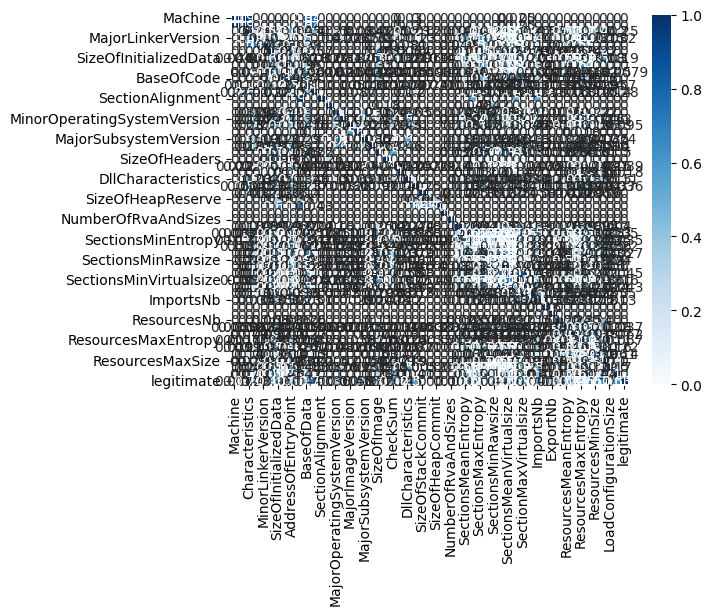

In [ ]:
import numpy as np
# Get the pps matrix results
pps_results = pps.matrix(clean_dataset)[['x', 'y', 'ppscore']]

# Create a pivot table manually
features = clean_dataset.columns
matrix_data = np.zeros((len(features), len(features)))
matrix_df = pd.DataFrame(matrix_data, index=features, columns=features)

for index, row in pps_results.iterrows():
    if row['x'] in features and row['y'] in features:
        matrix_df.loc[row['y'], row['x']] = row['ppscore']

sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

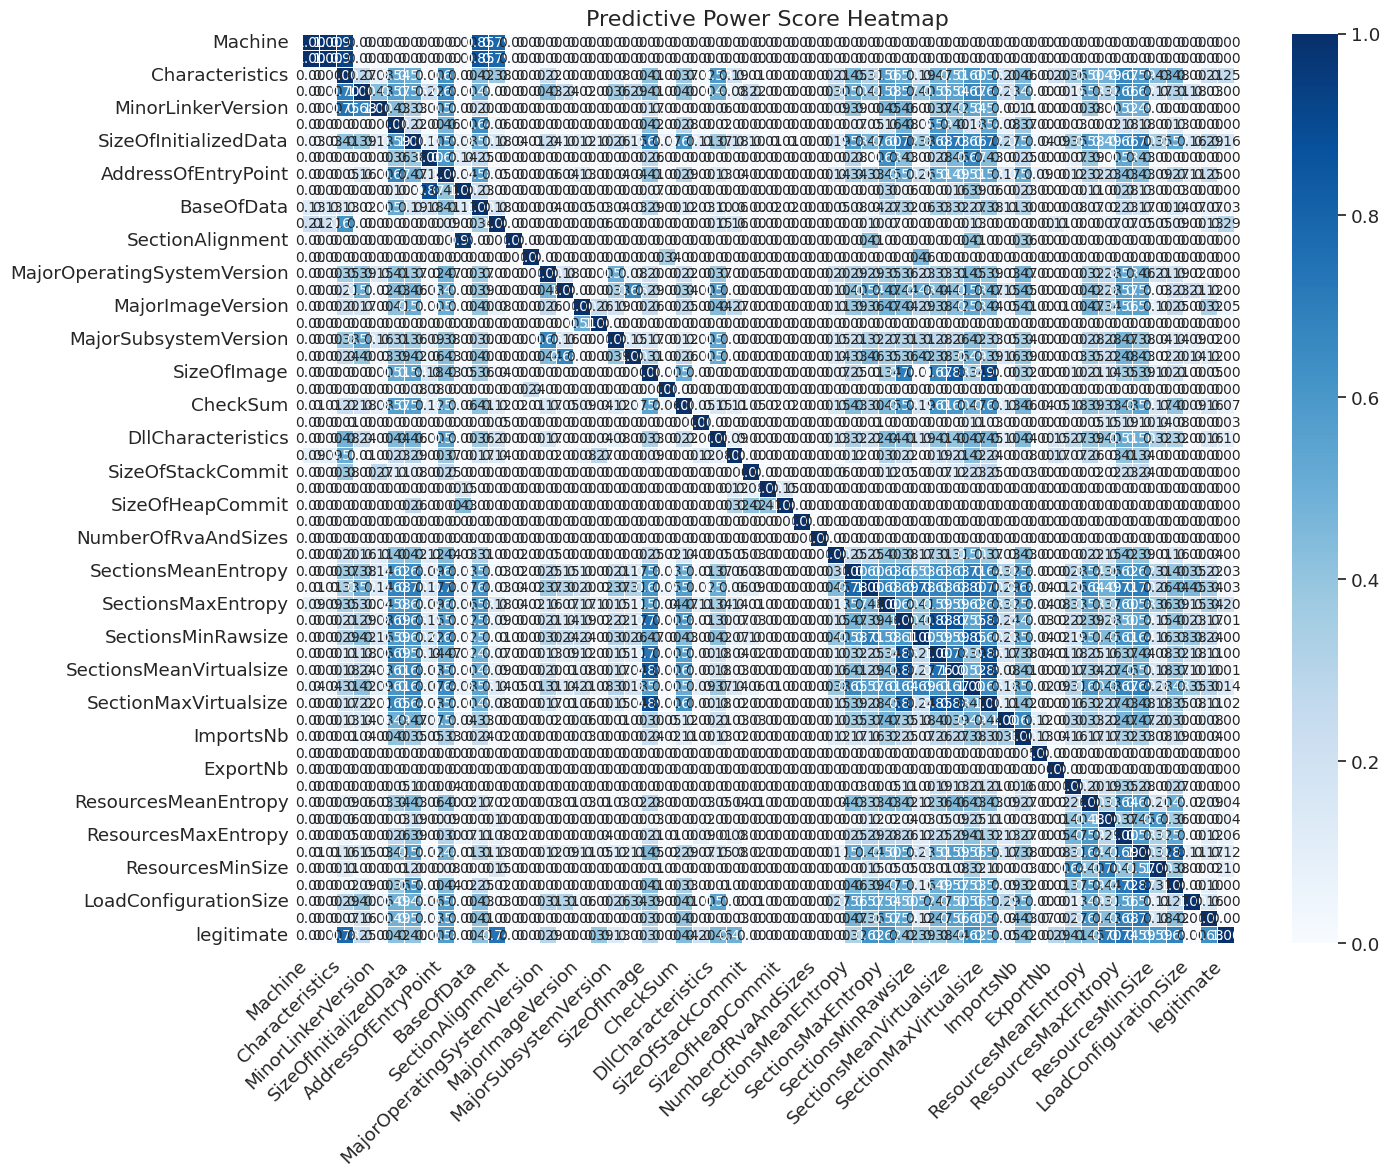

In [ ]:

# Δημιουργία πίνακα PPS
pps_results = pps.matrix(clean_dataset)[['x', 'y', 'ppscore']]
features = clean_dataset.columns
matrix_data = np.zeros((len(features), len(features)))
matrix_df = pd.DataFrame(matrix_data, index=features, columns=features)

for index, row in pps_results.iterrows():
    if row['x'] in features and row['y'] in features:
        matrix_df.loc[row['y'], row['x']] = row['ppscore']

# Ρύθμιση μεγέθους figure και βελτίωση εμφάνισης
plt.figure(figsize=(15, 12))  # Αύξησε το μέγεθος κατά βούληση
sns.set(font_scale=1.2)       # Μεγαλώνει τις ετικέτες άξονα και τιμές

# Δημιουργία heatmap
sns.heatmap(
    matrix_df,
    vmin=0,
    vmax=1,
    cmap="Blues",
    linewidths=0.5,
    annot=True,
    annot_kws={"size": 10},  # Μέγεθος γραμματοσειράς σχολίων
    fmt=".2f"                # Δείχνει τα scores με 2 δεκαδικά
)

plt.title("Predictive Power Score Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
